# Pymaceuticals Inc.
---

### Analysis

- Preparing the data
 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [84]:
# Checking the number of mice

num_unique_mice = merged_data["Mouse ID"].nunique()
print(num_unique_mice)

249


In [85]:
# Data should be uniquely identified by Mouse ID and Timepoint
duplicate_mouse_id= merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [87]:
#Getting all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
 #Created a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_id)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [89]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_study_data_complete['Mouse ID'].nunique()
mice_count



248

## Summary Statistics

In [90]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate summary statistics
summary_statistics = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better readability
summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
}, inplace=True)

# Display the summary statistics DataFrame
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:

# Group the data by 'Drug Regimen' and calculate summary statistics
summary_statistics = merged_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})


# Display the DataFrame of summary statistics
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

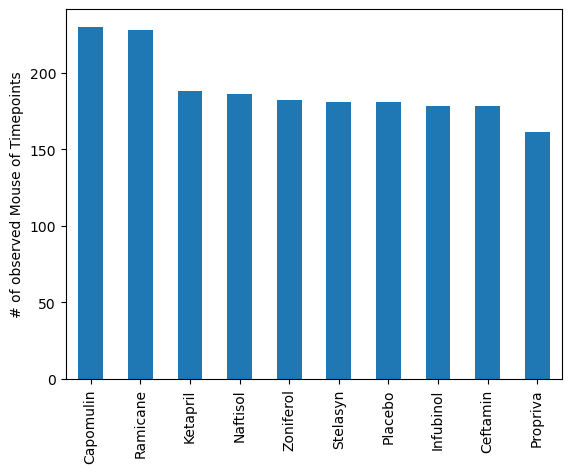

In [91]:

# Group the data by 'Drug Regimen' and calculate the total number of timepoints for each drug regimen

timepoints_per_regimen = merged_data['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas
timepoints_per_regimen.plot(kind='bar', ylabel='# of observed Mouse of Timepoints')
plt.show()

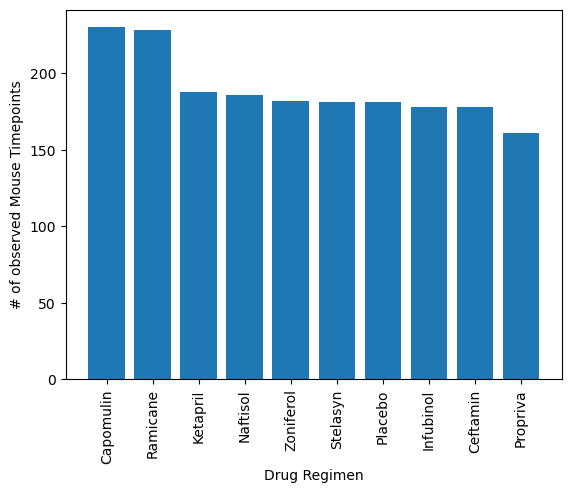

In [92]:

# Generate a bar plot using Pyplot
plt.bar(timepoints_per_regimen.index, timepoints_per_regimen.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

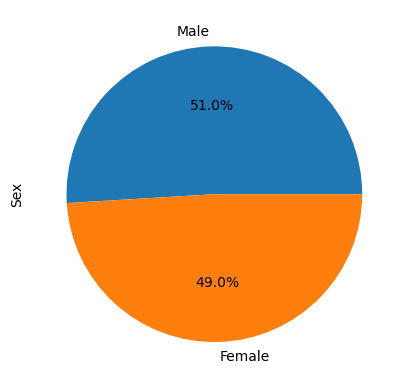

In [93]:
# Generating a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by 'Sex' and calculate the count of male and female mice
mice_distribution = clean_study_data_complete['Sex'].value_counts()

# Generate a pie plot using Pandas
mice_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

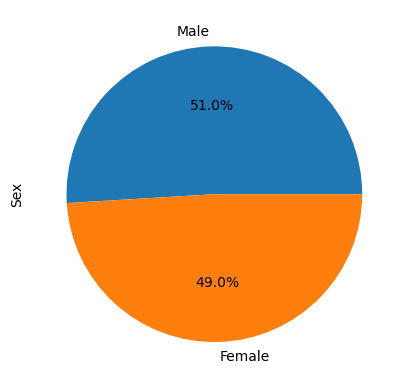

In [94]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot

# Generate a pie plot using Pyplot
plt.pie(mice_distribution, labels=mice_distribution.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [96]:
# List of the four specified treatment regimens
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 1: Get the last (greatest) timepoint for each mouse in the specified treatment regimens
last_timepoints = merged_data.loc[merged_data['Drug Regimen'].isin(treatment_groups)] \
                              .groupby('Mouse ID')['Timepoint'].max()

# Step 2: Merge the group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, merged_data, on=['Mouse ID', 'Timepoint'], how='inner')


In [97]:


# Listing  four specified treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

#Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes =final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset of tumor volumes to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the interquartile range (IQR) and the lower and upper bounds for outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile, upper_quartile = quartiles[0.25], quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Display information for each treatment regimen
    print(f"{treatment}'s potential outliers: {outliers.tolist()}\n")

Capomulin's potential outliers: []

Ramicane's potential outliers: []

Infubinol's potential outliers: [36.3213458]

Ceftamin's potential outliers: []



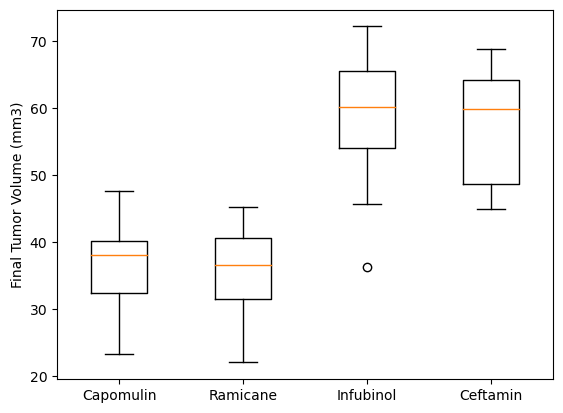

In [98]:
# Generating a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatment_groups)
plt.xlabel('')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('')
plt.show()

## Line and Scatter Plots

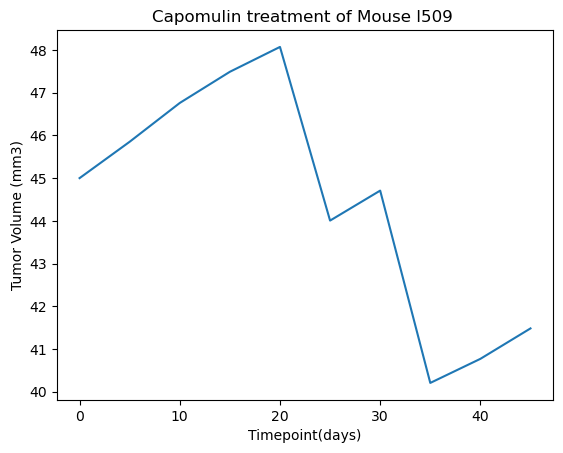

In [99]:
# Generating a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Step 1: Filter the data for the Capomulin treatment regimen
capomulin_data = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']

# Step 2: Select data for a single mouse treated with Capomulin (e.g., 's185')
mouse_id = 'l509'
single_mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]

# Step 3: Generate the line plot
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capomulin treatment of Mouse {mouse_id} ")
plt.show()

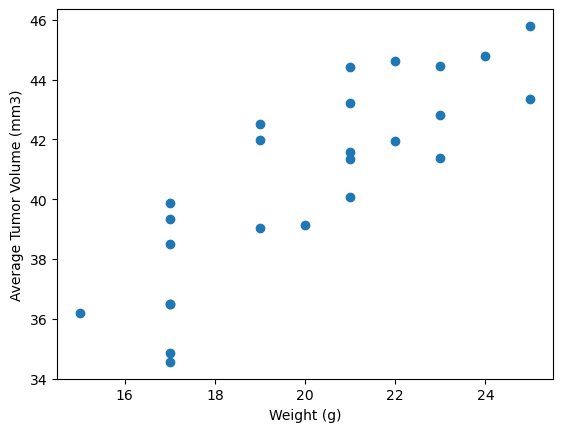

In [100]:
#Generating a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Calculate the average tumor volume and mouse weight for each mouse in the Capomulin regimen
average_volume_weight = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
})

#Generate the scatter plot
plt.scatter(average_volume_weight['Weight (g)'], average_volume_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84
Linear Regression Model: y = 0.95x + 21.55


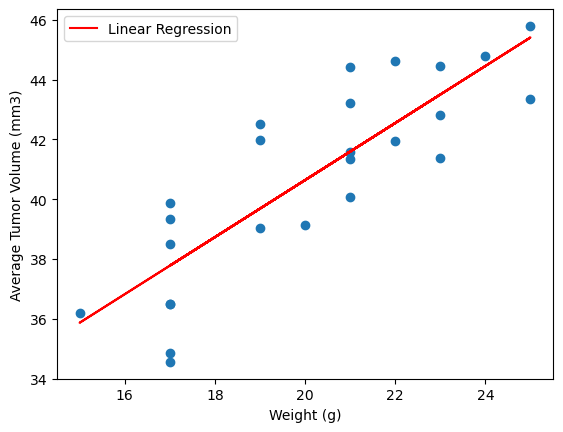

In [101]:
# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = average_volume_weight.corr().iloc[0, 1]

# Calculate the linear regression model
slope, intercept, r_value, _, _ = linregress(average_volume_weight['Weight (g)'], average_volume_weight['Tumor Volume (mm3)'])

# Display the results
print(f"The correlation between mouse weight and the average tumor volume is: {correlation:.2f}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

# Generate the scatter plot and linear regression line
plt.scatter(average_volume_weight['Weight (g)'], average_volume_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('')

# Plot the linear regression line
plt.plot(average_volume_weight['Weight (g)'], slope * average_volume_weight['Weight (g)'] + intercept, color='red', label='Linear Regression')
plt.legend()
plt.show()